In [1]:
import pandas as pd
import pulse2percept as p2p

In [2]:
df = pd.read_parquet("datasets/MNIST/train.parquet")
df.shape

(60000, 2)

In [3]:
test = pd.read_parquet("datasets/MNIST/test.parquet")
test.shape

(10000, 2)

In [4]:
print(df)

                                                   image  label
0      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      5
1      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0
2      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      4
3      {'bytes': b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      1
4      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      9
...                                                  ...    ...
59995  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      8
59996  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      3
59997  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      5
59998  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      6
59999  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      8

[60000 rows x 2 columns]


In [5]:
from PIL import Image
import io
import matplotlib.pyplot as plt

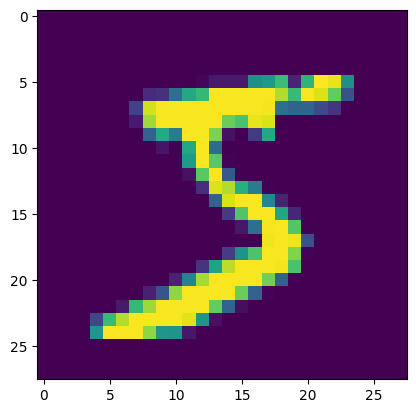

In [6]:
%matplotlib inline
image = Image.open(io.BytesIO(df["image"].iloc[0]['bytes']))
plt.imshow(image)

In [7]:
import numpy as np

In [8]:
img = np.array(image)

In [21]:
img.shape

(28, 28)

In [9]:
stim = p2p.stimuli.ImageStimulus(img)

<Axes: >

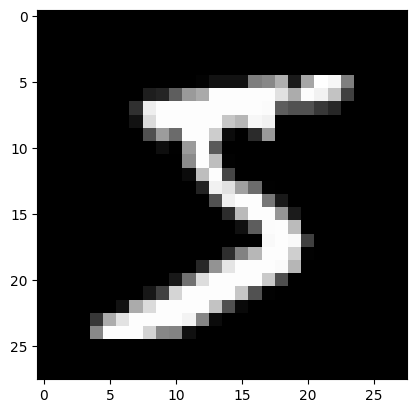

In [10]:
stim.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

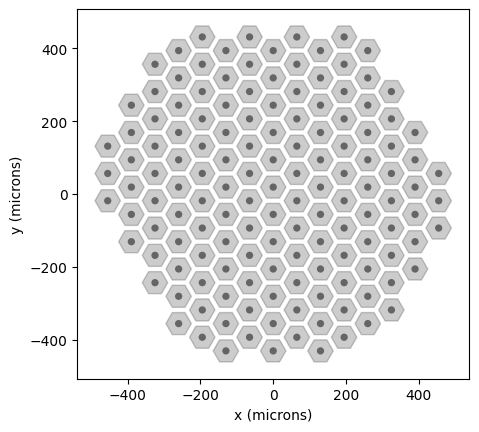

In [11]:
implant = p2p.implants.PRIMA75()
implant.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

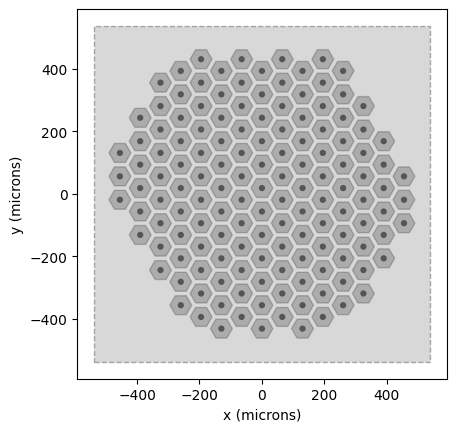

In [12]:
model = p2p.models.ScoreboardModel(xrange=(-2, 2), yrange=(-2, 2), xystep=0.15, rho=20)
model.build()
model.plot()
implant.plot()

In [13]:
implant.stim = stim.resize(implant.shape)

In [14]:
percept = model.predict_percept(implant)

In [15]:
frame = percept.max(axis='frames')
frame

array([[0.00e+00, 0.00e+00, ..., 4.76e-44, 0.00e+00],
       [0.00e+00, 0.00e+00, ..., 2.05e-35, 8.69e-44],
       ...,
       [9.49e-37, 2.23e-28, ..., 0.00e+00, 0.00e+00],
       [9.25e-44, 2.18e-35, ..., 0.00e+00, 0.00e+00]], dtype=float32)

In [16]:
print(frame.shape)

(28, 28)


In [17]:
np.max(frame)

0.79800826

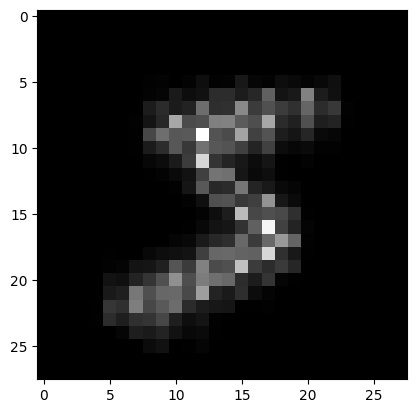

In [18]:
plt.imshow(frame, cmap='gray')

0.7204643

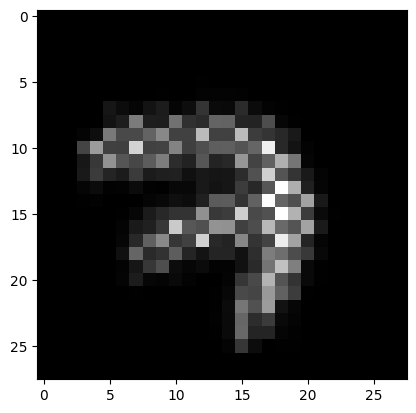

In [26]:
file = np.load('Out/prima75scoreboard/traindata.npz')
plt.imshow(file['data'][5000], cmap='grey')
np.max(file['data'][5000])

In [28]:
print(file['data'].shape)

(60000, 28, 28)


In [29]:
file = np.load('Out/prima75scoreboard/trainlabels.npz')
print(file['data'].shape)

(60000,)
